## Expoloring Escher

In [165]:
%%html
<style type="text/css">
div.CodeMirror span.CodeMirror-matchingbracket {
    color: #FF0000;
    font-weight: bold;
}
</style>

We are going to need the ability to display SVG images.

Jupyter notebook has support for displaying SVG images. Let's import it.

In [297]:
(import "IPython.display")
(define SVG IPython.display.SVG)

(import "builtins")
(define python builtins)

In [16]:
;; hack to read files from scheme
(define (read-file path)
  (let ((f (builtins.open path)))
    (f.read)))

## SVG Example

In [17]:
%%file test.svg
<svg version="1.1"
     width="300" height="200"
     xmlns="http://www.w3.org/2000/svg">

  <rect width="100%" height="100%" fill="red" />

  <circle cx="150" cy="100" r="80" fill="green" />

  <text x="150" y="125" font-size="60" text-anchor="middle" fill="white">SVG</text>

</svg>

Created file '/Users/anand/trainings/2022/lambda-retreat/test.svg'.


In [18]:
(define svg (read-file "test.svg"))

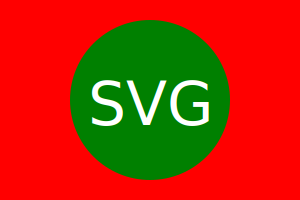

In [15]:
(SVG svg)

## Functional Geometry

Let's create a new language to describe graphics. 

Primives:
- circle
- rectangle
- line

- translate
- rotate 
- scale

Combine:
- combine
- beside
- below



In [22]:
(define (caddddr x) 
  (cadddr (cdr x)))

(define (isinstance? value tag)
  (and (pair? value) 
       (eq? (car value) tag)))

(define (circle x y r) 
  (list 'circle x y r))

(define circle-x cadr)
(define circle-y caddr)
(define circle-r cadddr)

(define (rectangle x y w h) 
  (list 'rectangle x y w h))

(define rectangle-x cadr)
(define rectangle-y caddr)
(define rectangle-w cadddr)
(define rectangle-h caddddr)





In [25]:
(define r (rectangle 0 1 10 20))

## Joy!

Assume shape is a function that returns the svg for rendering that shape. 

In [351]:
(define (circle r)
  (lambda ()
    (format "<circle r=\"~a\" />" r)))

(define (rectangle w h)
  (lambda ()
    (format "<rect x='~a' y='~a' width='~a' height='~a' />" (/ w -2) (/ h -2) w h)))

(define (line x1 y1 x2 y2)
  (lambda ()
    (format "<line x1='~a' y1='~a' x2='~a' y2='~a' />" x1 y1 x2 y2)))


And `render` is a function that shows the shape as an image by making it an svg document.

In [352]:
(define (render-svg w h shape)
  (SVG 
    (string-append
         (format 
          "<svg version='1.1' viewBox='~a ~a ~a ~a' width='~a' height='~a' fill='none' stroke='black' xmlns='http://www.w3.org/2000/svg'>"
          (/ w -2)
          (/ h -2)
          w
          h
          w
          h)
         (shape)
         "</svg>")))

(define (render shape)
  (render-svg 200 200 shape))


; scale is defined later
(define (render-large shape)
  (render-svg 400 400 ((scale 2 2) shape)))

(define (render-xlarge shape)
  (render-svg 800 800 ((scale 4 4) shape)))

(define (render-debug shape)
  (render (apply combine 
                 (list   
                  shape 
                  (rectangle 200 200)
                  (line -100 0 100 0)
                  (line 0 -100 0 100)))))

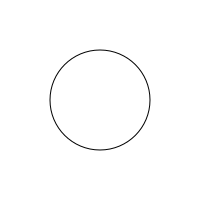

In [95]:
(render (circle 50))

In [144]:
(define (transform t)
  (lambda (shape)
    (lambda ()
      (string-append 
       (format "<g transform='~a'>" t)
       (shape)
       "</g>"))))
 
(define (translate x y)
  (transform 
   (format "translate(~a ~a)" x y)))
 
(define (scale xs ys)
  (transform 
   (format "scale(~a ~a)" xs ys)))

(define (rotate angle)
  (transform
   (format "rotate(~a)" angle)))

In [137]:
(define (combine . shapes)
  (lambda ()
    (string-append  
     "<g>"
     (apply string-append 
            (map (lambda (s) (s)) shapes))
     "</g>")))

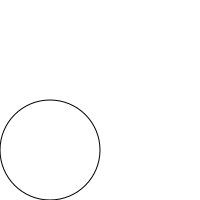

In [146]:
(render ((translate -50 50) (circle 50)))

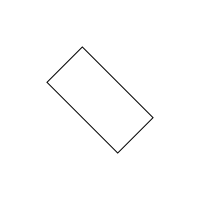

In [147]:
(render ((rotate 45) (rectangle 100 50)))

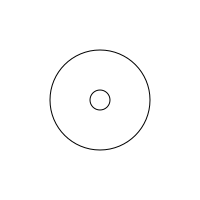

In [129]:
(render (combine (circle 50) (circle 10)))

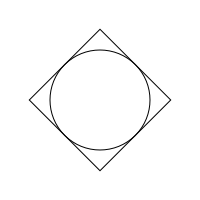

In [132]:
(render (rotate 
         (combine 
          (circle 50) 
          (rectangle 100 100))
         45))

In [ ]:
(define (fixed-point* f))

(define (repeat n transform)
  ()

In [148]:
(define (square x) (* x x))

In [ ]:
(define (repeat n f)
  ())

In [149]:
; unrelated idea
; scan from APL  
; (scan + (list 1 2 3 4 5))


Write a function that applies fixedpoint on a function n times and collects all the steps.


In [158]:

(define (scan-fixed-point f n x)
  (define (iter i x result)
    (if (= i n)
        result
        (let ((fx (f x)))
          (iter (+ i 1) fx (cons fx result)))))
  (iter 0 x '()))
  
(define (scan-fixed-point f n x)
  (define (iter i x result)
    (if (= i n)
        (reverse result)
        (let ((fx (f x)))
          (iter (+ i 1) fx (cons fx result)))))
  (iter 1 x (list x)))
    

In [159]:
(scan-fixed-point square 5 2)

(2 4 16 256 65536)

In [171]:
(define (identity x) x)

(define (repeat-transform transform n)
  (if (= n 0)
      identity
      (lambda (shape)
        (combine shape (transform ((repeat-transform transform (- n 1)) shape))))))

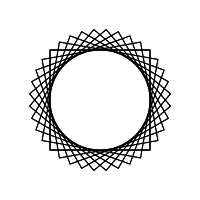

In [177]:
(render 
 ((repeat-transform (rotate 10) 18) 
  (rectangle 100 100)))

Combine multiple transformations.

In [245]:
(define (compose t1 t2)
  (lambda (shape) (t1 (t2 shape))))

In [179]:
(define shape (combine (circle 50) (rectangle 100 100)))

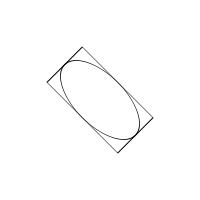

In [195]:
(render ((compose (rotate 45) (scale 1 0.5)) shape))

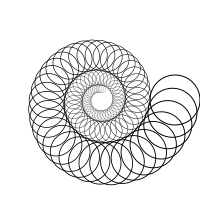

In [257]:
(render 
 (let ((shape ((translate 75 0) (circle 25))))
   ((repeat-transform 
     (compose (rotate 10) (scale 0.981 0.981))
     100)
    shape)))

In [267]:
(define (spiral shape)
 (let ((s ((translate 75 0) shape)))
   ((repeat-transform 
     (compose (rotate 10) (scale 0.981 0.981))
     50)
    s)))

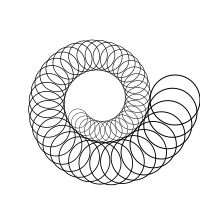

In [268]:
(render (spiral (circle 25)))

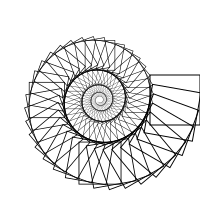

In [218]:
(render (spiral (rectangle 50 50)))

In [232]:
(define (pipeline value . procs)
    (if (null? procs)
        value
        (apply pipeline 
                (cons 
                 ((car procs) value) 
                 (cdr procs)))))

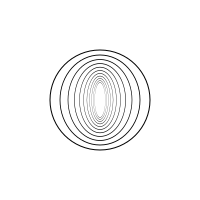

In [241]:
(pipeline 
 (circle 50)
 (repeat-transform (scale 0.8 0.9) 10)
 render)

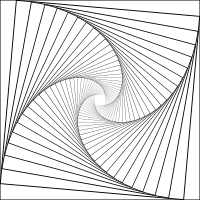

In [261]:
(pipeline 
 (rectangle 200 200)
 (repeat-transform 
  (compose (scale 0.92 0.92) (rotate 5))
  50)
 render)

In [262]:
(define rect-spiral 
  (pipeline 
   (rectangle 200 200)
   (repeat-transform 
    (compose (scale 0.92 0.92) (rotate 5))
    50)
   (scale 0.25 0.25)))

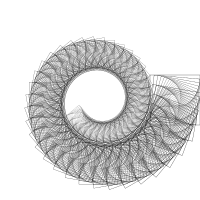

In [269]:
(render (spiral rect-spiral))

## Functiona Geometry

In [275]:
(define (beside a b)
  (combine 
   (pipeline a (scale 0.5 1.0) (translate -50 0))
   (pipeline b (scale 0.5 1.0) (translate 50 0))))

(define (below a b)
  (combine 
   (pipeline a (scale 1.0 0.5) (translate 0 -50))
   (pipeline b (scale 1.0 0.5) (translate 0 50))))

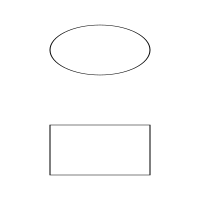

In [278]:
(render 
 (below (circle 50) (rectangle 100 100)))

In [279]:
(define (quartlet a b c d)
  (below 
   (beside a b)
   (beside c d)))

In [280]:
(define (clone4 a) (quartlet a a a a))

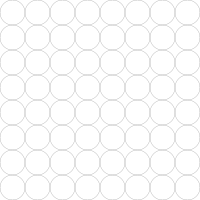

In [288]:
(pipeline 
 (circle 100)
 clone4
 render)

In [325]:

(define (random-circles r n)
  (lambda ()
    ((apply combine (map (lambda (i) (circle (random r))) (python.range n))))))

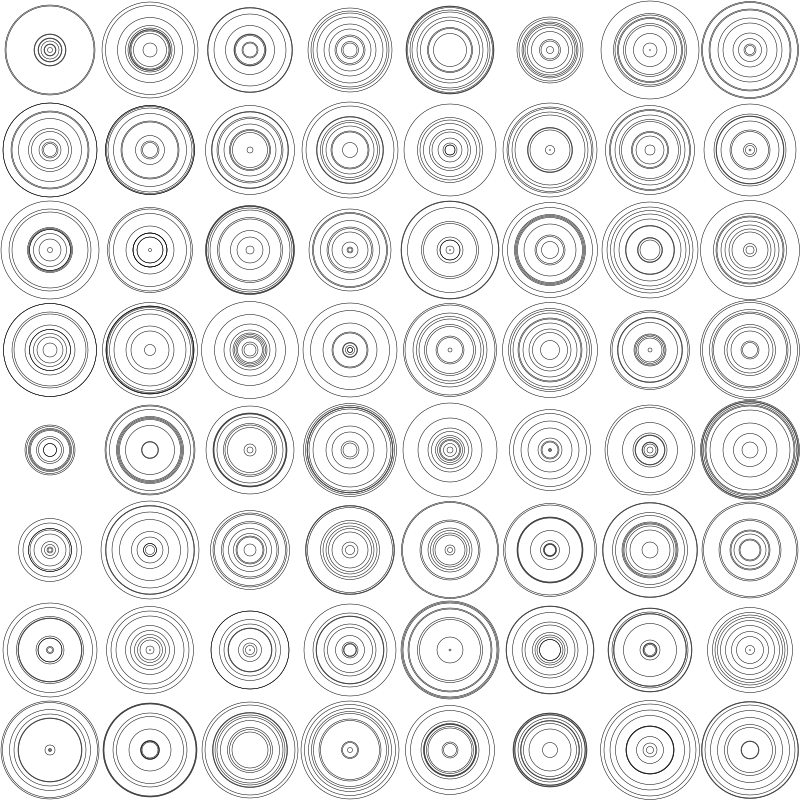

In [335]:
(pipeline 
 (random-circles 100 10)
 clone4
 clone4
 clone4
 render-xlarge)

Back to Peter Hinderson's Functional Geometry.

In [435]:
(define (path d)
  (lambda () 
    (format "<path d='~a' />" d)))

(define (filled-path d)
  (lambda () 
    (format "<path fill='black' d='~a' />" d)))

In [397]:
(define f 
  (pipeline
  (path 
   "M5.08,5.08 L 45.72 5.08 45.72 10.16 10.16 10.16 10.16 20.32 30.48 20.32 30.48 25.4 10.16 25.4 10.16 45.72 5.08 45.72 5.08 5.08"
   )
   (scale 3.0 3.0)
   (translate -50 -70)))

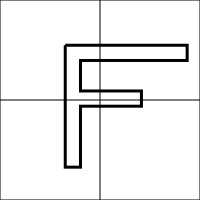

In [400]:
(render-debug f)

In [408]:
(define flip (scale -1 1))
(define rot (rotate -90))

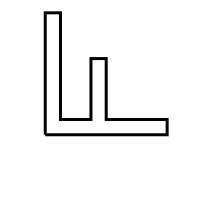

In [409]:
(render (rot f))

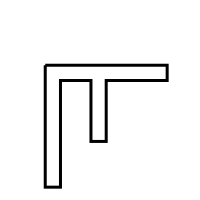

In [410]:
(render (rot (flip f)))

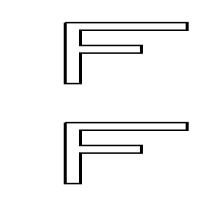

In [412]:
(render (below f f))

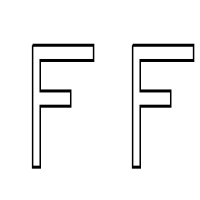

In [413]:
(render (beside f f))

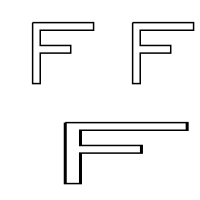

In [416]:
(render (below (beside f f) f))

In [427]:
(define 1/SQRT2 (expt 2 -0.5))

In [428]:
(define rot45 (compose (scale 1/SQRT2 1/SQRT2) (rotate -45)))

In [425]:
(expt 2 4)

16.0

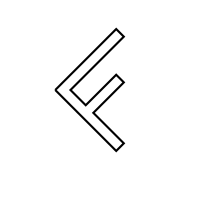

In [429]:
(render (rot45 f))

#### The fish

In [430]:
(define fish_path
  "M -4.2207441,256.03034 C -28.145511,234.64868 -48.352478,216.63385 -64.254835,194.25807 c 0,-0.98162 1.409231,-4.58443 3.131624,-8.00625 9.780189,-19.42994 18.510553,-32.02794 40.347284,-58.22148 l 11.6713579,-14 -0.5810892,-5.95367 C -12.866405,70.238313 -11.000232,42.188243 -1.6245701,6.280326 -0.44826504,-4.552565 2.1569119,1.0296139 16.04983,11.409158 31.80326,24.108892 46.438782,31.394353 61.228466,55.314218 l 18.47934,0.80424 c 21.018664,0.914754 29.546174,2.279685 41.537354,6.120755 l 9,2.88293 c 0.0945,11.792891 0.18906,23.585782 0.28359,35.378677 0.0814,10.15961 0.16287,20.31922 0.24431,30.47883 -10.50136,10.51677 -21.58698,23.07846 -32.08834,33.59523 14.06059,22.8839 52.10904,35.64861 85.22757,39.00203 l 13.66713,1.22844 9.56869,11.23743 c 10.78341,12.66401 17.40255,18.3707 36.09705,31.12106 l 13,8.8665 c 1.33842,0.7382 8.30977,4.88574 -1.5,3.88201 l -19.25,-3.68746 c -26.32015,-5.0418 -38.48678,-6.65619 -50.25,-6.66768 -9.38398,-0.009 -27.96557,1.23366 -37.02773,2.47659 -3.87372,0.5313 -4.40901,0.2337 -14,-7.78357 -29.85673,-24.95774 -39.871065,-32.158 -58.505535,-42.06515 l -10.53326,-5.60009 c -20.811164,20.81902 -41.622317,41.63804 -62.4334701,62.45707 -2.21316496,3.12868 -6.965909,-3.01172 -6.965909,-3.01172 z M 61.803945,194.95944 C 50.531083,188.98956 40.40126,183.25734 27.305528,175.34765 l -6.754753,6.47832 c -3.536929,3.39218 -10.53586,8.30385 -14.4839431,12.21821 -6.31395894,6.26003 -7.939397,8.70463 -13.498717,20.30159 -5.7692039,12.03478 -8.8304989,16.00434 -8.8182649,11.43457 0.008,-3.00548 11.4878289,-25.49609 15.74548296,-30.84775 C 1.7259409,192.12882 8.372517,186.3979 14.097255,181.97548 l 10.741024,-8.29756 c -4.207436,-3.82316 -8.004154,-7.27638 -11.339194,-10.98081 -1.24991,-0.5529 -17.0361021,12.2674 -22.5955641,18.35034 -2.8578029,3.12689 -8.6443609,11.26473 -12.8590179,18.08407 -7.041702,11.39353 -10.299338,14.82367 -10.299338,10.84471 0,-2.03202 11.995257,-21.24309 18.142644,-29.05646 2.644213,-3.36081 8.4833679,-8.98581 12.9758999,-12.5 4.492532,-3.51418 11.4432581,-8.3652 12.5847181,-9.26519 C 1.4377364,142.53161 -1.7064185,131.95557 -7.8508061,118.29212 l -14.0058249,17.06987 c -18.407479,22.43447 -23.802822,30.06405 -32.294897,45.66835 l -7.074778,13 c 5.999036,4.93102 41.372597,48.14728 61.97156998,61.5 C 22.561403,234.48013 38.760552,218.01213 61.803945,194.95944 z M -7.2548351,242.51953 C 3.2541256,226.12534 26.190195,194.2622 40.413595,185.53034 c -9.194645,15.38335 -30.067556,33.10097 -41.24502108,52.79312 -1.78332402,3.17503 -3.60588202,5.20524 -4.67340902,5.20586 -0.9625,5.6e-4 -1.75,-0.45384 -1.75,-1.00979 z M -45.254835,197.45001 c 0,-2.02853 11.205169,-22.9919 14.961761,-27.99146 6.316815,-7.86762 33.3296708,-35.18953 34.2312897,-27.04427 -16.6533327,10.47874 -36.2675407,32.23172 -43.0855567,49.86606 -1.733518,3.45456 -3.800751,6.25 -4.621889,6.25 -0.817083,0 -1.485605,-0.48615 -1.485605,-1.08033 z m 281.223395,49.32353 c -16.53242,-11.55112 -26.48235,-20.87994 -37.90361,-35.53751 -2.12475,-2.72682 -2.61988,-2.84067 -20.49857,-4.71335 -41.29693,-3.67905 -79.727773,-25.41347 -90.359285,-56.99234 -19.418393,-48.4311 -8.034463,-84.647267 -52.96193,-120.882837 -3.85,-3.16484 -12.6884,-9.65735 -19.6409,-14.4278 L 1.9633729,5.546172 C -9.641588,46.319455 -11.246694,88.443563 -3.8678647,116.69064 c 4.9485443,18.94364 13.9120427,37.55338 27.6414417,49.58108 20.120295,17.62647 74.865213,36.73222 121.471583,82.30002 l 5.5,-0.51387 c 35.04438,-3.27426 45.67213,-2.87049 76,2.88739 9.625,1.82735 18.13568,3.38155 18.91262,3.45377 0.77694,0.0722 -3.58321,-3.35925 -9.68922,-7.62549 z m -57.7234,-17.58865 C 114.84075,203.60146 97.505663,195.44895 80.066053,177.92482 57.002968,150.78367 43.835211,120.86796 30.637475,88.018981 c -6.662998,-24.866011 4.774135,2.895003 8.281419,11.775776 8.22961,20.553433 17.512392,34.863533 24.628245,47.993013 20.033752,36.96433 47.128131,51.04988 125.448021,81.72205 13.00195,5.09191 20.75,8.77958 20.75,9.64164 0,0.75839 -0.7875,1.36818 -1.75,1.3551 -0.9625,-0.0131 -14.35,-5.10783 -29.75,-11.32167 z M 4.4664931,85.774195 C 3.8384406,80.865818 2.1039515,45.709369 8.8642806,44.240948 c 1.5155094,-0.253205 3.1525274,2.067688 4.6947584,5.369471 2.976272,6.371935 5.599528,16.397006 6.315175,18.624249 l 2.10273,8.577367 C 14.495321,81.740921 8.8564089,88.629661 6.7080086,88.3433 5.533146,88.475127 4.8579884,87.595736 4.4664931,85.774195 z M 6.8906482,84.102279 C 10.86679,80.232388 16.962726,77.10653 19.148649,75.152542 14.409646,54.995888 10.892524,47.229403 9.2075279,48.095515 6.4848717,58.109433 6.2541696,70.750092 6.8906482,84.102279 z M 22.664175,38.938253 c 2.772591,-2.483362 26.930795,19.823141 26.930795,22.472621 0,0.544116 -4.38678,3.089995 -9.230553,5.341842 -3.531321,1.641695 -8.558047,4.018164 -9.380188,4.018164 -2.412811,-2.264133 -9.47291,-30.407563 -8.320054,-31.832627 z m 3.300748,4.243751 c -1.891754,-1.32108 3.510607,18.073228 5.716434,24.267649 8.013578,-2.283375 14.353163,-6.99971 14.253502,-7.312251 C 40.984785,54.946039 29.523328,44.769161 25.964923,43.182004 z m 62.865352,88.348336 c -2.49329,0 -0.721904,-3.04198 4.88639,-8.3914 2.278533,-2.17336 4.28533,-3.88722 6.244053,-5.23383 4.996562,-3.4351 9.680292,-4.48041 17.763912,-4.66701 l 9.00008,-0.20776 c -0.0614,-4.14133 0.34883,-9.82321 -0.75824,-13.136793 -0.42827,0.264693 -5.54093,-1.408851 -9.10016,-2.171765 -10.50631,-2.25198 -13.47316,-1.200361 -21.662504,2.724298 -7.83663,3.75561 -9.458661,4.83971 -9.458661,2.78448 0,-0.71487 3.65458,-3.07737 8.1213,-5.250017 7.348095,-3.57414 8.799985,-3.9334 15.249995,-3.77359 3.92078,0.0971 9.43266,1.079694 12.3787,1.60352 l 5.83426,1.037372 c 0.0748,-1.197325 0.20337,-3.375755 0.30518,-5.687864 0.15696,-3.564397 0.25022,-7.446495 -0.0157,-8.541485 -8.45958,-3.945156 -18.33598,-7.165029 -26.14755,-7.281232 -8.302223,-0.123502 -15.834295,0.03183 -21.977331,2.568846 -2.732244,1.128391 -4.259138,3.003355 -6.387368,5.259062 3.477717,14.490596 12.237245,68.186238 23.552176,78.582448 9.898943,-9.88246 20.187423,-21.80983 30.086383,-31.69227 1.92823,-6.78475 0.64872,-13.84968 -0.47808,-14.03878 -19.55293,-4.48221 -31.455088,8.48165 -37.436805,15.51377 z m 37.914885,-63.682657 -5.3846,-1.904158 -10.02638,-3.54563 C 106.6178,60.73004 102.11572,59.915418 97.181611,59.40953 91.454934,58.822382 85.146286,58.651119 77.245165,58.044453 72.845164,57.706611 63.85389,57.609461 62.62028,57.352487 c 1.249729,2.634372 2.75999,5.563313 4.220937,8.583427 2.242502,4.635769 4.368816,9.486354 5.258373,13.816167 6.91308,-4.693346 13.461538,-6.044705 19.713742,-6.578177 7.392558,-0.657693 16.135208,0.882942 22.955088,2.544154 5.87105,1.430094 10.31713,2.949548 11.25016,3.232765 1.13687,0.345092 1.29474,-1.221868 1.18082,-3.550245 -0.10603,-2.167253 -0.44755,-4.994189 -0.45424,-7.552895 z m 12.64676,114.545847 c -2.90282,-0.74731 -6.91418,-3.14668 -10.30114,-6.06993 -1.91717,-1.65469 -3.63427,-3.47725 -4.83701,-5.26305 -1.01961,-1.51389 -1.66956,-3.00137 -1.75838,-4.33778 -0.27291,-3.21807 4.23116,3.9643 7.47286,7.26654 1.06762,1.13916 2.53717,2.1524 4.11935,3.08677 3.08048,1.81922 6.58789,3.33942 8.38683,4.90772 -0.069,0.73412 -1.15751,1.23822 -3.08251,0.40973 z m -1.57762,-18.53569 c -1.06389,-0.64878 -1.93526,-1.10287 -2.83379,-2.28729 -1.06757,-1.40726 -1.97908,-3.0679 -2.64102,-4.68559 -1.45362,-3.55248 -2.39222,-6.76012 -0.44843,-6.76012 0.4823,0 1.29583,1.99069 2.05446,3.94922 0.51683,1.33427 1.00818,2.65362 1.35198,3.31844 0.84844,1.64069 2.88499,3.67725 4.52568,4.52568 0.77517,3.93209 -1.33538,2.36354 -2.00888,1.93966 z"
  )

In [554]:
(define fish 
  (pipeline 
   (filled-path fish_path)
   (translate -130 -130)
   (scale (/ 200 260) (/ 200 260))
   (scale 0.5 0.5)))

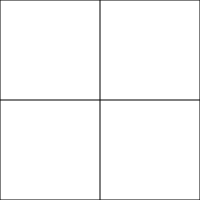

In [555]:
(render-debug (clone4 fish))

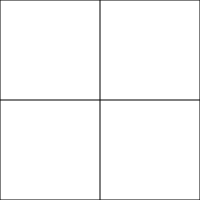

In [556]:
(render-debug 
 (quartlet 
  fish (rot (rot (rot fish)))
  (rot fish) (rot (rot fish))))

In [557]:
(define over combine)

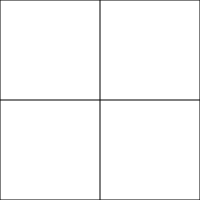

In [558]:
(render-debug 
 (over 
  fish 
  (rot (rot fish))))

In [559]:
(define fish2 ((translate 0 -65)(flip (rot45 fish))))
(define fish3 ((translate 65 0)(rot (rot (rot (flip (rot45 fish)))))))

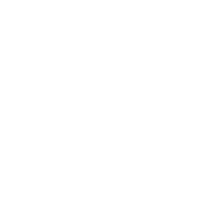

In [560]:
(render fish3)

In [561]:
(define t (over fish (over fish2 fish3)))

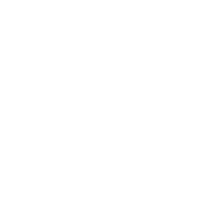

In [562]:
(render t)

In [563]:
(define u 
  (over 
   (over fish2 (rot fish2))
   (over (rot (rot fish2))
         (rot (rot (rot fish2))))))

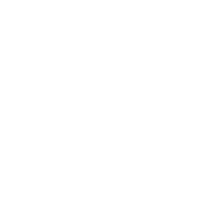

In [564]:
(render u)

In [570]:
(define blank 
  (lambda () ""))
(define _ blank)

In [584]:
(define (cycle p) 
  (quartlet 
            p (rot (rot (rot p)))
            (rot p) (rot (rot p))))

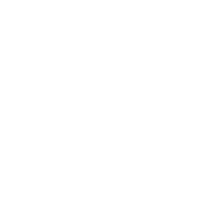

In [585]:
(render (quartlet u u u u))

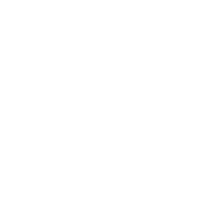

In [589]:
(pipeline 
 (rot t)
 (scale 1.55 1.55)
 cycle
 (scale 0.75 0.75)
 render)

In [605]:
(define t2 ((scale 1.55 1.55) t))
(define u2 ((scale 1.55 1.55) u))

(define v 
  (pipeline 
   (rot t2)
   cycle))

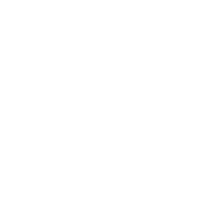

In [597]:
(render (quartlet v v v v))

In [606]:

(define (side n)
  (if (= n 0) _
      (let ((s (side (- n 1))))
        (quartlet s s (rot t2) t2))))

(define (corner n)
  (if (= n 0) 
      _
      (let ((c (corner (- n 1)))
            (s (side (- n 1))))
        (quartlet c s (rot s) u2))))


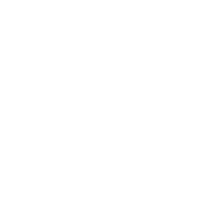

In [607]:
(render (side 3))

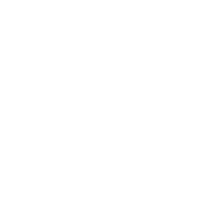

In [609]:
(render (corner 3))

In [664]:
(define (beside3 a b c)
  (define (scale-and-shift shape x)
    (pipeline 
     shape
     (scale (/ 1 3.0) 1)
     (translate (/ x 3.0) 0)))
  
  (over
   (scale-and-shift a -200)
   (scale-and-shift b 0)
   (scale-and-shift c 200)))

(define (below3 a b c)
  (define (scale-and-shift shape y)
    (pipeline 
     shape
     (scale 1 (/ 1 3.0))
     (translate 0 (/ y 3.0))))
  
  (over
   (scale-and-shift a -200)
   (scale-and-shift b 0)
   (scale-and-shift c 200)))


In [665]:
(define x (circle 100))

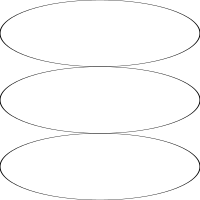

In [666]:
(render (below3 x x x))

In [654]:
(/ 1 3.0)

0.3333333333333333

In [667]:
(define (nonet p q r
               s t u
               v w x)
    (below3
     (beside3 p q r)
     (beside3 s t u)
     (beside3 v w x)))

In [684]:
(define (square-limit n)
  (let ((c (corner n))
        (s (side n)))
    (nonet 
     c s (rot (rot (rot c)))
     (rot s) u2 (rot (rot (rot s)))
     (rot c) (rot (rot s)) (rot (rot c)))))     

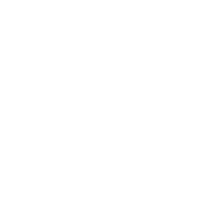

In [685]:
(render (square-limit 2))